In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import SGDRegressor, LinearRegression, Ridge, Lasso  
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.linear_model import Ridge, Lasso
ridge = Ridge()
print("Ridge imported successfully!")

# Task 1: Data Preprocessing
print("Starting Task 1: Data Preprocessing...")

data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)

Ridge imported successfully!
Starting Task 1: Data Preprocessing...


# Data Preprocessing
- Handling missing values
- Removing duplicates
- Encoding categorical variables
- Normalizing numerical variables
- Splitting into train, validation, and test sets

In [2]:
# Handle Missing Values
data.dropna(inplace=True)

# Remove Duplicates
data.drop_duplicates(inplace=True)

# Encoding Categorical Variables
categorical_cols = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "sex", "native-country", "income"]
encoder = OneHotEncoder(drop='first', sparse_output=False)
categorical_encoded = pd.DataFrame(encoder.fit_transform(data[categorical_cols]))
categorical_encoded.columns = encoder.get_feature_names_out(categorical_cols)
data = data.drop(columns=categorical_cols).reset_index(drop=True)
data = pd.concat([data, categorical_encoded], axis=1)

# Splitting Data
X = data.drop(columns=["hours-per-week"])
y = data["hours-per-week"]
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Scaling Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [3]:
# Outlier Detection & Treatment (Only on Training Set)
Q1 = np.percentile(X_train_scaled, 25, axis=0)
Q3 = np.percentile(X_train_scaled, 75, axis=0)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
mask = np.all((X_train_scaled >= lower_bound) & (X_train_scaled <= upper_bound), axis=1)
X_train_scaled = X_train_scaled[mask]
y_train = y_train[mask]

print("Task 1 Completed: Data Preprocessed Successfully!")

Task 1 Completed: Data Preprocessed Successfully!


Starting Task 2: Exploratory Data Analysis...


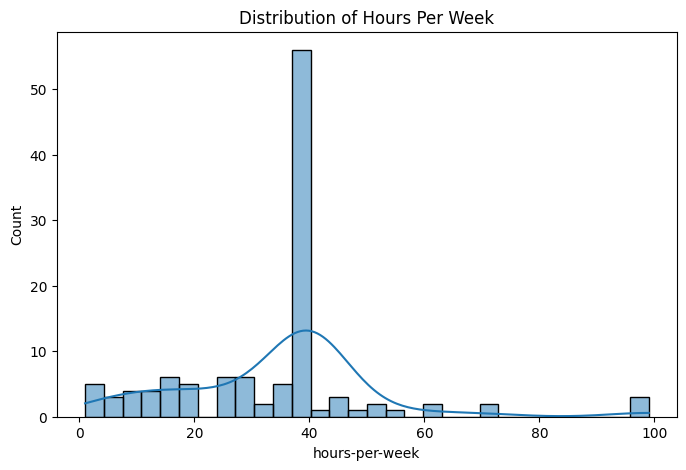

count    117.000000
mean      34.658120
std       17.443091
min        1.000000
25%       25.000000
50%       40.000000
75%       40.000000
max       99.000000
Name: hours-per-week, dtype: float64
Missing values in dataset:
age                               0
fnlwgt                            0
education-num                     0
capital-gain                      0
capital-loss                      0
                                 ..
native-country_Trinadad&Tobago    0
native-country_United-States      0
native-country_Vietnam            0
native-country_Yugoslavia         0
income_>50K                       0
Length: 101, dtype: int64


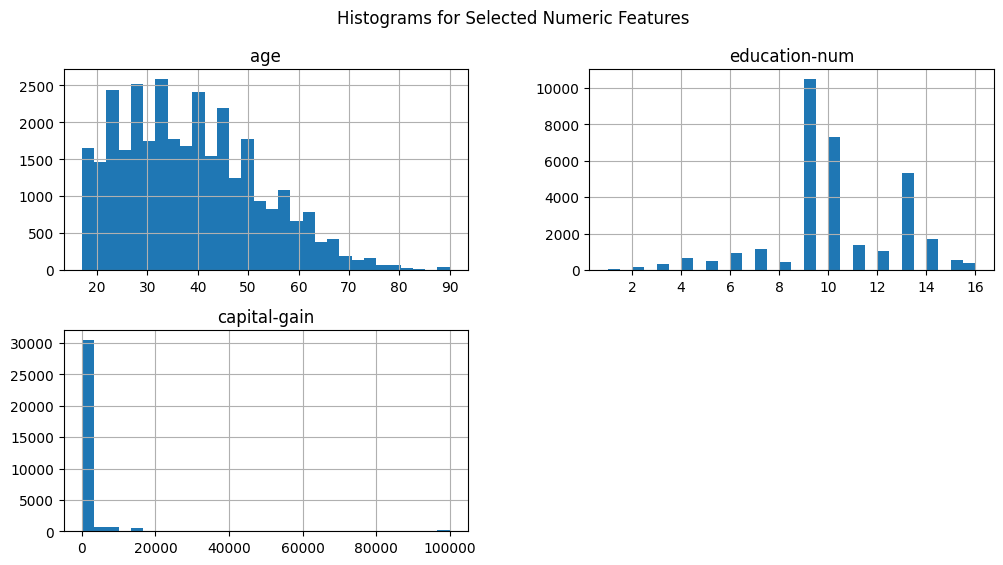

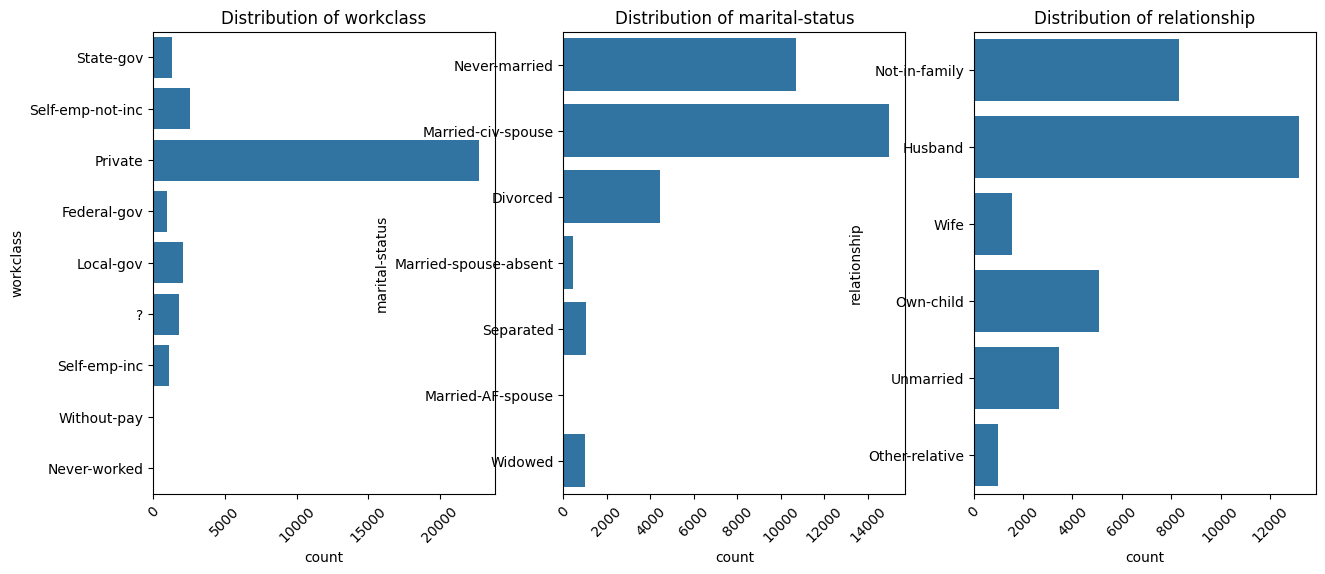

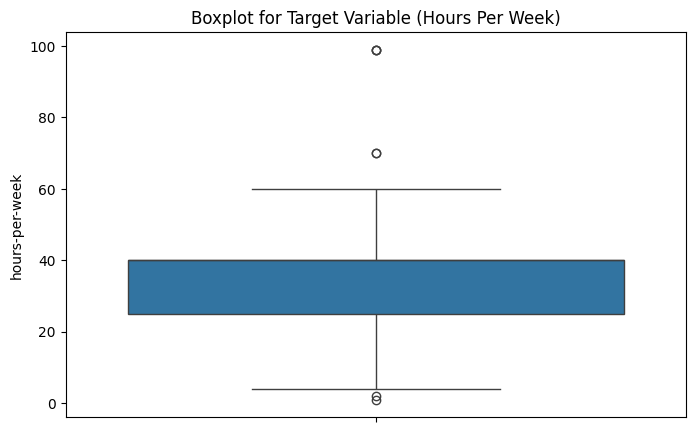

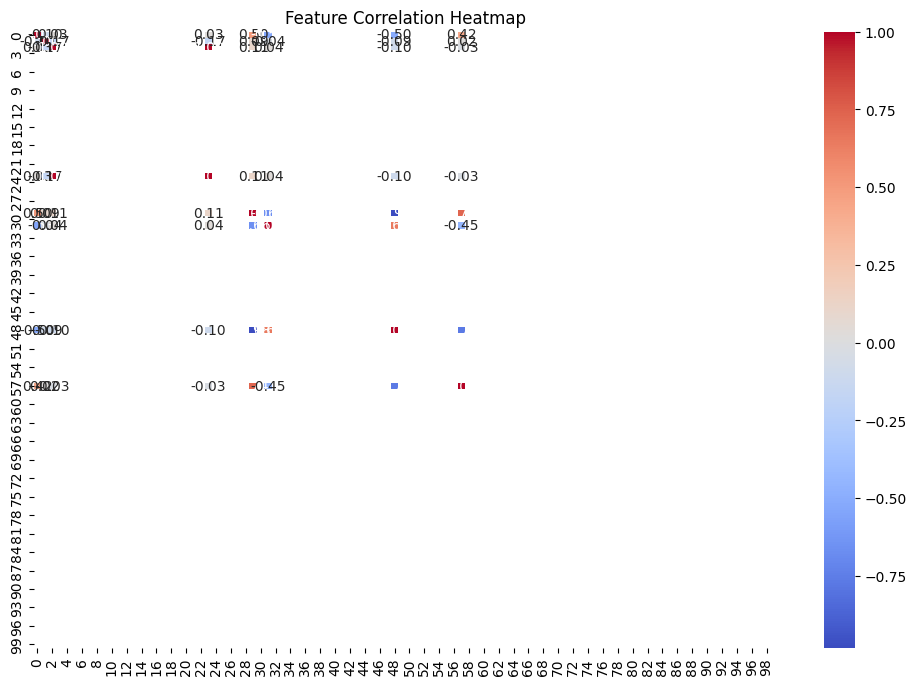

Task 2 Completed: EDA Done!


In [4]:
# Task 2: Exploratory Data Analysis (EDA)
print("Starting Task 2: Exploratory Data Analysis...")

# Target variable distribution
plt.figure(figsize=(8,5))
sns.histplot(y_train, kde=True, bins=30)
plt.title("Distribution of Hours Per Week")
plt.show()

# Reload dataset (before encoding) for categorical visualization
raw_data = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)

# Summary statistics
print(y_train.describe())

# Checking missing values
print("Missing values in dataset:")
print(data.isnull().sum())

# Histograms for numerical features
num_cols = ["age", "education-num", "capital-gain"]
data[num_cols].hist(figsize=(12,6), bins=30)
plt.suptitle("Histograms for Selected Numeric Features")
plt.show()

# Bar plots for categorical features using raw_data (before encoding)
cat_cols = ["workclass", "marital-status", "relationship"]
plt.figure(figsize=(15,6))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(1, 3, i)
    sns.countplot(y=raw_data[col])  
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}")
plt.show()

# Boxplot for outlier detection
plt.figure(figsize=(8,5))
sns.boxplot(y=y_train)
plt.title("Boxplot for Target Variable (Hours Per Week)")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(pd.DataFrame(X_train_scaled).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

print("Task 2 Completed: EDA Done!")


In [5]:
# Task 3: Regression Modeling
print("Starting Task 3: Regression Modeling...")
models = {
    "Linear Regression": LinearRegression(),
    "SGD Regressor": SGDRegressor(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(max_depth=10),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    results[name] = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "R2 Score": r2_score(y_test, y_pred)
    }

Starting Task 3: Regression Modeling...


Starting Task 4: Optimized Clustering Analysis...


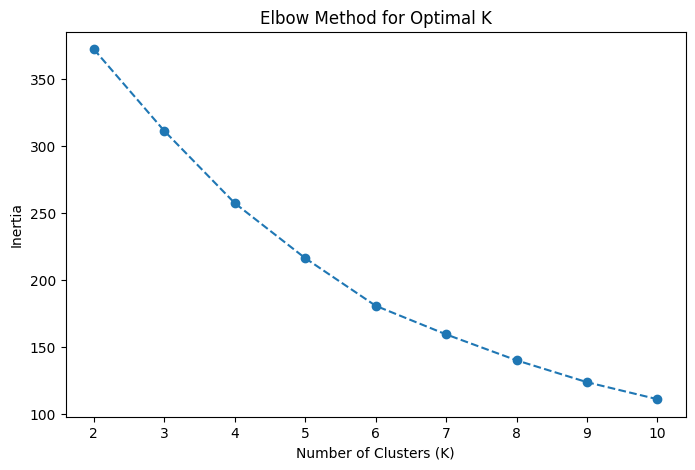

Silhouette Score for K-Means: 0.33892416144288906
Task 4 Completed: Optimized Clustering Done!


In [6]:
# Task 4: Clustering Analysis (Optimized for Performance)
print("Starting Task 4: Optimized Clustering Analysis...")

# Reduce dataset size for clustering
X_cluster_sample = X_train_scaled[:10000]  # Use a subset of 10,000 rows

# Apply PCA for dimensionality reduction before clustering
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_cluster_sample)

# Apply the Elbow Method for Optimal K in K-Means
inertia = []
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=300, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

# Train K-Means with optimal K
optimal_k = 4  # Choose based on elbow method graph
kmeans = KMeans(n_clusters=optimal_k, n_init=10, max_iter=300, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)

# Compute Silhouette Score
silhouette_avg = silhouette_score(X_pca, kmeans_labels)
print(f"Silhouette Score for K-Means: {silhouette_avg}")

# Apply Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=optimal_k)
hierarchical_labels = hierarchical.fit_predict(X_pca)

# Apply DBSCAN with optimized parameters
dbscan = DBSCAN(eps=0.3, min_samples=5, n_jobs=-1)  # Enable parallel processing
dbscan_labels = dbscan.fit_predict(X_pca)

print("Task 4 Completed: Optimized Clustering Done!")

In [ ]:
# Task 5: Neural Network Regression
print("Starting Task 5: Neural Network Regression...")

nn_model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

nn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = nn_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=50, batch_size=32, verbose=1
)

y_pred_nn = nn_model.predict(X_test_scaled)

print("Task 5 Completed Successfully!")

Starting Task 5: Neural Network Regression...


NameError: name 'keras' is not defined

In [ ]:
# Save Preprocessed Data
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)
train_data.to_csv("train_data.csv", index=False)
test_data.to_csv("test_data.csv", index=False)

print("Model tuning, training, evaluation, and clustering complete. Results saved.")

Model tuning, training, evaluation, and clustering complete. Results saved.
